In [2]:
%pip install torch

     |████████████████████████████████| 129.9MB 4.0MB/s eta 0:00:013
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

     |████████████████████████████████| 7.3MB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 931kB 6.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install IPython

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/z9/4zd9zcr55lggc3ylk5dhw43m0000gn/T/ipykernel_1315/1910353632.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


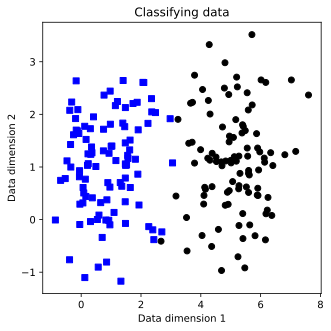

In [8]:
## Create data

nPerCluster = 100
blur = 1

# center point of data
A = [1,1]
B = [5,1]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur , A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur , B[1]+np.random.randn(nPerCluster)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))

# concat into matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Classifying data')
plt.xlabel('Data dimension 1')
plt.ylabel('Data dimension 2')
plt.show()

In [9]:
# Building the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [10]:
# Other model features
learningRate = 0.01

# Loss func
lossfun = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningRate)

In [11]:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    print(f"Epoch = {epochi}")
    # forward pass
    yHat = ANNclassify(data)
    
    # computer loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss
    print(f'Loss = {loss}')
    # backward prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch = 0
Loss = 0.5768897533416748
Epoch = 1
Loss = 0.5758761763572693
Epoch = 2
Loss = 0.5748655200004578
Epoch = 3
Loss = 0.5738575458526611
Epoch = 4
Loss = 0.5728524923324585
Epoch = 5
Loss = 0.5718501806259155
Epoch = 6
Loss = 0.5708505511283875
Epoch = 7
Loss = 0.5698536038398743
Epoch = 8
Loss = 0.5688594579696655
Epoch = 9
Loss = 0.5678678154945374
Epoch = 10
Loss = 0.5668787360191345
Epoch = 11
Loss = 0.5658922791481018
Epoch = 12
Loss = 0.5649083256721497
Epoch = 13
Loss = 0.5639269351959229
Epoch = 14
Loss = 0.5629479885101318
Epoch = 15
Loss = 0.5619714856147766
Epoch = 16
Loss = 0.560997486114502
Epoch = 17
Loss = 0.5600258111953735
Epoch = 18
Loss = 0.5590565204620361
Epoch = 19
Loss = 0.558089554309845
Epoch = 20
Loss = 0.5571249127388
Epoch = 21
Loss = 0.5561626553535461
Epoch = 22
Loss = 0.5552025437355042
Epoch = 23
Loss = 0.5542448163032532
Epoch = 24
Loss = 0.5532892346382141
Epoch = 25
Loss = 0.5523359179496765
Epoch = 26
Loss = 0.5513847470283508
Epoch = 27
Loss 

Epoch = 690
Loss = 0.25880181789398193
Epoch = 691
Loss = 0.2585839629173279
Epoch = 692
Loss = 0.25836634635925293
Epoch = 693
Loss = 0.2581491470336914
Epoch = 694
Loss = 0.257932186126709
Epoch = 695
Loss = 0.2577155828475952
Epoch = 696
Loss = 0.2574992775917053
Epoch = 697
Loss = 0.2572833001613617
Epoch = 698
Loss = 0.25706759095191956
Epoch = 699
Loss = 0.25685223937034607
Epoch = 700
Loss = 0.2566371262073517
Epoch = 701
Loss = 0.25642240047454834
Epoch = 702
Loss = 0.2562079429626465
Epoch = 703
Loss = 0.2559937834739685
Epoch = 704
Loss = 0.2557799816131592
Epoch = 705
Loss = 0.25556641817092896
Epoch = 706
Loss = 0.255353182554245
Epoch = 707
Loss = 0.2551402449607849
Epoch = 708
Loss = 0.2549276351928711
Epoch = 709
Loss = 0.25471532344818115
Epoch = 710
Loss = 0.2545032799243927
Epoch = 711
Loss = 0.2542915642261505
Epoch = 712
Loss = 0.2540801763534546
Epoch = 713
Loss = 0.25386905670166016
Epoch = 714
Loss = 0.2536582052707672
Epoch = 715
Loss = 0.2534477114677429
Epoch 

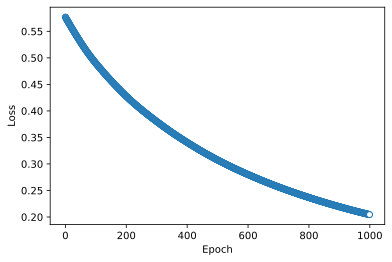

In [12]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
# compute prediction

## Manually compute loss
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerCluster)

print(f'Final accuracy: {totalacc}%')

Final accuracy: 97.0%


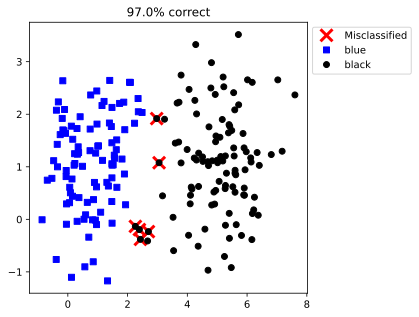

In [16]:
# plot labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()